https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Let's import the usual libraries, `torch`, its `nn` module, the `DataLoader` class, and `torchvision` for the dataset.

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms

When working with CIFAR-10, we'll have to normalize the images.

So we'll create a transform that not only converts to a tensor, but transforms the pixel values to something expected by the model.

Additionally, let's create the train and test dataset objects.

In [ ]:
# create a transform to preprocess data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

# set up training dataset of CIFAR10
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transform
)

# set up a test dataset of CIFAR10
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transform
)

Let's specify a batch size of 4, create the train and test dataloader objects, and check out the shapes of the images and labels.

In [ ]:
# specify batch size and set up data loaders

batch_size = 4

train_dataloader = DataLoader(
    training_data,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
)

test_dataloader = DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2
)

# grab the first iterate of the data loader and look at the shape

for X, y in test_dataloader:
    N, C, H, W = X.shape
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [18]:
# specify the device to use

device = (
    "cuda" if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


Let's visualize some images from the dataset with matplotlib.

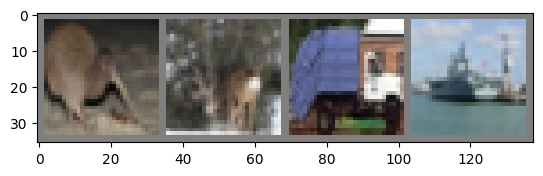

bird  deer  truck ship 


In [40]:
import matplotlib.pyplot as plt
import numpy as np

# write a function to show an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# an alternative way to get an iterate of the dataloader
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

# print the labels corresponding to each image
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Next, let's define the convolutional neural network class.

In [21]:
# define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # define the feature extraction layers
        self.features = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        # define the classification layers
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )
    
    # define the forward pass
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.classifier(x)
        return x

# instantiate the model
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


We can check out the shapes of the model's parameters.

In [22]:
# check out the model parameters
for param in model.parameters():
    print(param.shape)
    print(param.requires_grad)

torch.Size([6, 3, 5, 5])
True
torch.Size([6])
True
torch.Size([16, 6, 5, 5])
True
torch.Size([16])
True
torch.Size([120, 400])
True
torch.Size([120])
True
torch.Size([84, 120])
True
torch.Size([84])
True
torch.Size([10, 84])
True
torch.Size([10])
True


... and look at their names and values.

In [23]:
# check out the model's named parameters
for name, param in model.named_parameters():
    print(f"Layer {name} | Size: {param.shape} | Values: {param[:2]} \n")

Layer features.0.weight | Size: torch.Size([6, 3, 5, 5]) | Values: tensor([[[[-0.0796,  0.0783,  0.0609, -0.0713, -0.0435],
          [ 0.0153,  0.0658, -0.0289, -0.0202, -0.0678],
          [-0.0295,  0.0278, -0.1042,  0.0915,  0.0213],
          [ 0.0661,  0.0680,  0.0678, -0.1124,  0.1098],
          [ 0.0328,  0.0380, -0.0098,  0.0754,  0.0482]],

         [[-0.1076,  0.0552,  0.0509,  0.0740, -0.0579],
          [ 0.0217,  0.0815,  0.0002,  0.1089, -0.0823],
          [-0.0276,  0.1121,  0.0405, -0.1054,  0.0228],
          [ 0.1048,  0.0791,  0.1140, -0.0580, -0.0345],
          [ 0.0518,  0.0529, -0.1081, -0.0852, -0.0901]],

         [[ 0.0201,  0.0654, -0.1144,  0.0218, -0.0918],
          [ 0.0652,  0.0784,  0.0452, -0.0471,  0.0423],
          [-0.0216,  0.0120,  0.1108, -0.0654,  0.0444],
          [ 0.1092,  0.0159,  0.1127,  0.1056,  0.0436],
          [ 0.0899,  0.0940, -0.0293, -0.0566, -0.0277]]],


        [[[ 0.0364,  0.0011, -0.0333,  0.0485, -0.0114],
          [ 0

Let's use Cross Entropy Loss since we're doing classification.

Additionally, let's set up our optimizer.

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Now we'll do two training passes over the dataset.

In [ ]:
# loop over the dataset twice
for epoch in range(2):
    
    # keep track of the running loss
    running_loss = 0.0
    
    # loop over the dataset in batches
    for i, data in enumerate(train_dataloader, 0):
        # grab the input and labels
        inputs, labels = data
        
        optimizer.zero_grad()
        
        # pass the inputs through the model
        outputs = model(inputs)

        # calculate loss and backpropagate
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # tally the loss and print every 2000 mini-batches
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Let's save the model.

In [11]:
path = './cifar_net.pth'
torch.save(model.state_dict(), path)

We'll take a batch of images from the test set and see how the model performs.

In [ ]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Re-instantiating the model from the saved file, we can see how it performs on the same batch of images.

In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load(path, weights_only=True))

Feed the batch of images, and confirm the shape of the output.

In [35]:
outputs = model(images)

print(outputs)

batch_size, likelihoods = outputs.shape

print(f'batch_size: {batch_size}, classes: {likelihoods}')

tensor([[-5.2509e-02, -6.0919e-02,  2.6410e-02,  3.8475e-03, -4.5468e-02,
         -1.3457e-02, -1.0879e-01,  4.1445e-02, -1.3078e-01, -1.8186e-02],
        [-4.3990e-02, -5.9157e-02,  3.0198e-02, -1.0414e-04, -4.2513e-02,
         -5.4928e-03, -1.0223e-01,  6.8303e-02, -1.3088e-01, -2.8396e-02],
        [-4.2971e-02, -4.6533e-02,  2.6440e-02, -4.4020e-03, -3.8333e-02,
         -1.3755e-02, -9.5325e-02,  7.2662e-02, -1.2118e-01, -2.1165e-02],
        [-4.5617e-02, -5.9239e-02,  2.4477e-02, -2.0446e-03, -4.6018e-02,
         -1.5602e-02, -1.0133e-01,  6.2107e-02, -1.2850e-01, -2.4745e-02]],
       grad_fn=<AddmmBackward0>)
batch_size: 4, classes: 10


In [25]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(batch_size)))

Predicted:  cat   dog   deer  horse


Let's iterate over the test set and compare the model's predictions with the actual labels.

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total}%')

We can do the same accuracy calculation for each class.

In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class {classname:5s} is: {accuracy:.1f} %')